In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir("C:\\code\\activ")

In [3]:
from programs import tree

In [4]:
df = pd.read_excel("./documents/nov_nine_var.xlsx").iloc[:,1:22].to_numpy()

scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [5]:
power_lstm = tf.keras.models.load_model('./model/power_lstm/')

In [6]:
def shift_data(origin, d):
    return tf.concat(origin[1::], d)

In [7]:
def make_sequential(d):
    data = []

    i = 0
    e = len(d)
    while (e - i > 61):
        data.append([d[i:i+60].reshape(1, 60, 21), d[i+60+1].reshape(1, 21)])
        i += 1

    return data

In [28]:
# dd는 1부터 430까지 60개씩 이루어진 묶음
# dd에서 1 덩어리 떼서 예측하고 실제 값하고 비교해
# dd의 한 덩어리를 plot_tree에 넘겨서 60, 21을 return 받아
# return 받은 값을 하나씩 실제랑 비교해서 계산해

for v in range(50):
    dd = make_sequential(data)

    for d in dd:
        x = d[0]
        l = d[1]

        with tf.GradientTape() as tape:
            pred = power_lstm(x)
            error = tf.reduce_mean(tf.math.square(tf.math.subtract(pred, l)))

            xp = tree.plot_tree([power_lstm], x, 1, 60, plot=False)
            for i, x in enumerate(xp):
                pred_error = tf.reduce_mean(tf.math.square(tf.math.subtract(x, data[i])))
            
            loss = error + pred_error

        grads = tape.gradient(loss, power_lstm.trainable_weights)
        power_lstm.optimizer.apply_gradients(zip(grads, power_lstm.trainable_weights))

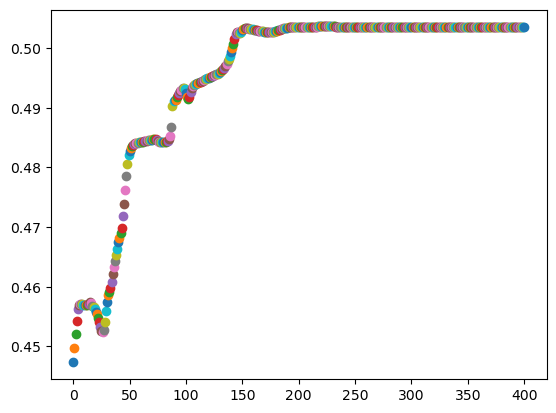

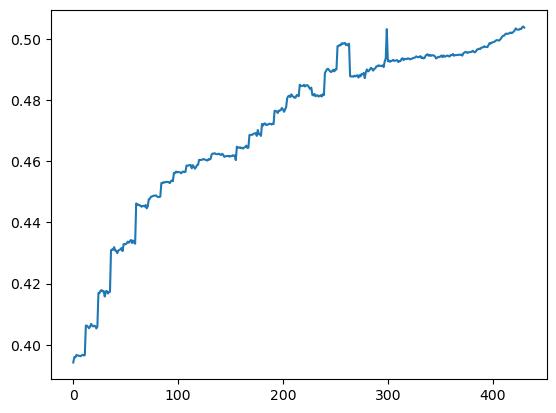

In [29]:
tree.plot_tree([power_lstm], data[0:60].reshape(1, 60, 21), 1, 400, plot=True)
plt.plot(tree.dnn_model(data))
plt.show()

In [19]:
data.shape

(431, 21)

In [30]:
power_lstm.save('./model/is_right_lstm')

INFO:tensorflow:Assets written to: ./model/is_right_lstm\assets


INFO:tensorflow:Assets written to: ./model/is_right_lstm\assets
